In [1]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201118_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [3]:
import pandas as pd

In [4]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [5]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_separatebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
            'multi_path': True,
            'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201118_generator(with_source=True, separate_bn_list=[True]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.379478   
                                                                                                  2560              0.543094   
                                                                                                  5120              0.580530   
                                                                                     cm-last      1280              0.401936   
                                                                                                  2560              0.573986   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560              0.633767   
                                                                                                  5120              0.675405   
                                                                                     cm-last      1280              0.510449   
                                                                                                  2560              0.634020   
                                                                                                  5120              0.678429   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.181373   
                                                                                                  2560           0.253170   
                                                                                                  5120           0.268277   
                                                                                     cm-last      1280           0.192658   
                                                                                                  2560           0.267190   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560           0.292438   
                                                                                                  5120           0.309832   
                                                                                     cm-last      1280           0.239853   
                                                                                                  2560           0.293527   
                                                                                                  5120           0.311925   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.389241   
                                                                                                  2560          0.481323   
                                                                                                  5120          0.498672   
                                                                                     cm-last      1280          0.407067   
                                                                           

In [7]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)
df_main_result_ref = df_main_result_ref[df_main_result_ref.index.get_level_values('rcnn_bl_cls') <= 7]

In [8]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [9]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           2           cm-avg       1280                  0.390532   
                                                                                                  2560                  0.536576   
                                                                                                  5120                  0.580945   
                                                                                     cm-last      1280                  0.376278   
                                                                                                  2560                  0.579874   
...                                                                                                                          ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560                  0.634244   
                                                                                                  5120                  0.665381   
                                                                                     cm-last      1280                  0.585469   
                                                                                                  2560                  0.636072   
                                                                                                  5120                  0.671014   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           2           cm-avg       1280               0.187182   
                                                                                                  2560               0.250899   
                                                                                                  5120               0.269328   
                                                                                     cm-last      1280               0.178842   
                                                                                                  2560               0.269225   
...                                                                                                                       ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560               0.292134   
                                                                                                  5120               0.305727   
                                                                                     cm-last      1280               0.271677   
                                                                                                  2560               0.293301   
                                                                                                  5120               0.308557   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.398958   
                                                                                                  2560              0.477141   
                                                                                                  5120              0.498833   
                                                                           

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

In [11]:
from scipy.stats import pearsonr, spearmanr

ref
new


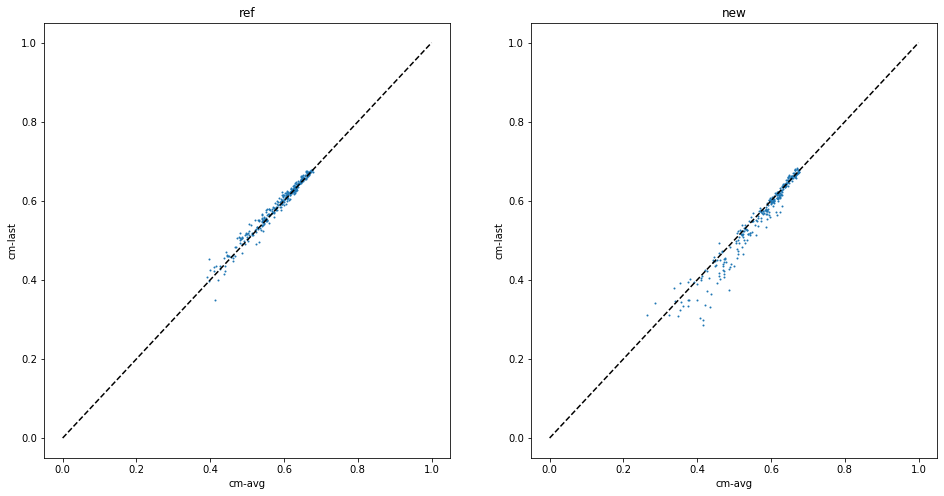

1280
2560
5120


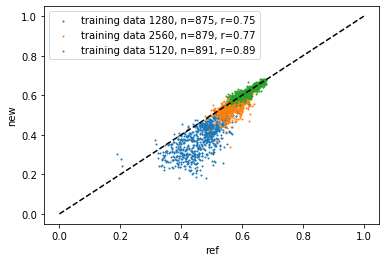

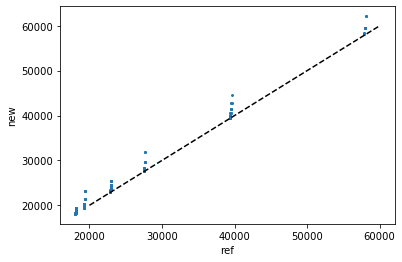

cm-avg
cm-last


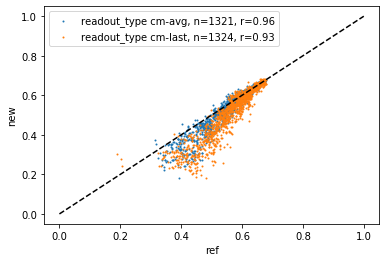

In [12]:
def plot_scatter():
    # check performance diff between two readout types
    
    perf_ref = aaaa['cc2_normed_avg_ref'].unstack('rcnn_bl_cls').max(axis=1).unstack('readout_type')
    perf_new = aaaa['cc2_normed_avg_new'].unstack('rcnn_bl_cls').max(axis=1).unstack('readout_type')
    
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=True, figsize=(16, 8))
    
    for readout_vs_idx, (readout_vs_name, readout_vs_data) in enumerate({'ref': perf_ref, 'new': perf_new}.items()):
        print(readout_vs_name)
        ax = axes[readout_vs_idx]
        ax.scatter(readout_vs_data.values[:,0], readout_vs_data.values[:,1], s=1)
        ax.set_xlabel(readout_vs_data.columns[0])
        ax.set_ylabel(readout_vs_data.columns[1])
        ax.plot([0,1],[0,1],linestyle='--',color='k')
        ax.set_title(readout_vs_name)
    plt.show()
    
    
    plt.close('all')
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('train_keep').unique():
        b = aaaa.xs(train_keep, level='train_keep')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='training data {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    plt.close('all')
    # show param size change
    fig, ax = plt.subplots(squeeze=True)
    ax.scatter(b['num_param_ref'].values, b['num_param_new'].values, s=1)
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([20000, 60000], [20000, 60000],linestyle='--',color='k')
    plt.show()
    
    plt.close('all')
    # show readout type
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('readout_type').unique():
        b = aaaa.xs(train_keep, level='readout_type')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='readout_type {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    
    
    
plot_scatter()

# more channels lead to higher correlation.
# which is kind of expected, because deep + thin leads to bad convergence properties.
# why -last performed worse than -avg: probably because there is more supervision in -avg during training.
# -avg training is used in K's paper


In [13]:
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=3, ncols=4, squeeze=False, figsize=(20, 16))
    axes = axes.ravel()
    aaaaaa = aaaa.xs(5120, level='train_keep')
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                idx_ax = idx1 * 4 + idx2 * 2 + idx3
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.5,0.75],[0.5,0.75],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
        
        
    
    plt.show()

8 2 cm-avg
8 2 cm-last
8 3 cm-avg
8 3 cm-last
16 2 cm-avg
16 2 cm-last
16 3 cm-avg
16 3 cm-last
32 2 cm-avg
32 2 cm-last
32 3 cm-avg
32 3 cm-last


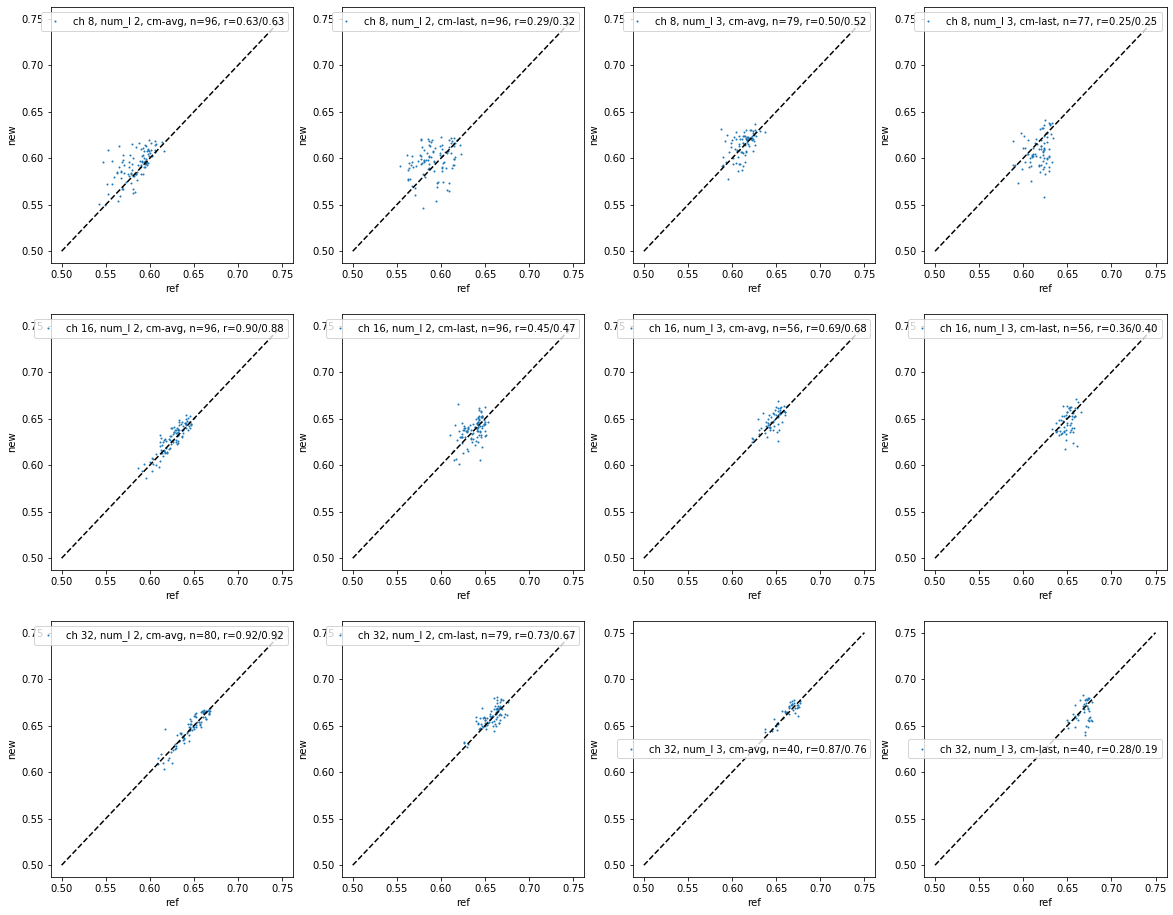

In [14]:
compute_correlations()

In [15]:
from scipy.stats import pearsonr
pearsonr(aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values)

(0.9303934264405851, 0.0)

In [16]:
df_main_result[df_main_result.isnull().any(axis=1)].index.get_level_values('rcnn_bl_cls').value_counts()
# high count models have OOM.

7     371
6     248
10    241
9     225
8     206
5     144
4      48
Name: rcnn_bl_cls, dtype: int64

In [17]:
df_main_result['cc2_normed_avg'].unstack('rcnn_bl_cls')

rcnn_bl_cls                                                                                             2   \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       1280        0.379478   
                                                                                      2560        0.543094   
                                                                                      5120        0.580530   
                                                                         cm-last      1280        0.401936   
                                                                                      2560        0.573986   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          cm-avg       2560        0.627283   
                                                                                      5120        0.665055   
                                                                         cm-last      1280        0.557288   
                                                                                      2560        0.627928   
                                                                                      5120        0.677565   

rcnn_bl_cls                                                                                             3   \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       1280        0.363240   
                                                                                      2560        0.539367   
                                                                                      5120        0.594414   
                                                                         cm-last      1280        0.310733   
                                                                                      2560        0.570403   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          cm-avg       2560        0.633767   
                                                                                      5120        0.675405   
                                                                         cm-last      1280        0.510449   
                                                                                      2560        0.634020   
                                                                                      5120        0.678429   

rcnn_bl_cls                                                                                             4   \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       1280        0.376586   
                                                                                      2560        0.554484   
                                                                                      5120        0.608342   
                                                                         cm-last      1280        0.358205   
                                                                                      2560        0.527905   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          cm-avg       2560             NaN   
                                                                                      5120             NaN   
                                      